In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
import numpy as np
from keras import layers
import tensorflow as tf
import os, time

from ipywidgets import IntProgress
from IPython.display import display

In [2]:
(train_data, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
# (train_data, _), (_,_) = tf.keras.datasets.mnist.load_data()
train_data.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [3]:
train_size = train_data.shape[0]
(h, w) = (train_data.shape[1], train_data.shape[2])
train_data = train_data.reshape(train_size, h, w, 1)
train_data = (train_data.astype(np.float32) - 127.5) / 127.5
train_data = np.clip(train_data, -1, 1)
train_data.shape

(60000, 28, 28, 1)

In [4]:
optim = keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

In [5]:
def make_discriminator():
    discriminator = keras.Sequential([
        layers.Conv2D(64, (3,3), padding='same', input_shape=(h,w,1)),
        layers.LeakyReLU(alpha=0.2),
        
        layers.Conv2D(128, (3,3), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        
        layers.Conv2D(128, (3,3), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        
        layers.Conv2D(256, (3,3), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        
        layers.Flatten(),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid'),
        
    ])
    discriminator.compile(loss='binary_crossentropy', optimizer=optim)
    return discriminator

In [6]:
noise_dim = 100
def make_generator():
    generator = keras.Sequential(
    [
        # 28x28 needed
        # 14x14
        # 7x7
        layers.Dense(7*7*256, input_dim=noise_dim),
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((7, 7, 256)),
        #7x7
        layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        # 14x14
        layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        #28x28
        
        layers.Conv2D(1, (3,3), activation='tanh', padding='same')
        
    ])
    generator.compile(loss='binary_crossentropy', optimizer=optim)
    return generator

In [7]:
discriminator = make_discriminator()
generator = make_generator()

discriminator.trainable = False

dcgan = keras.Sequential([generator, discriminator])
dcgan.compile(loss='binary_crossentropy', optimizer=optim)



In [8]:
def plot_generated_images(epoch, generator):
    noise = np.random.normal(0, 1, size=[10, noise_dim])
    images=generator.predict(noise)
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(images[i].reshape(h,w), cmap='gray')
        plt.axis('off')
        plt.tight_layout()
    plt.show()

1/1 [==============================] - 8s 8s/step


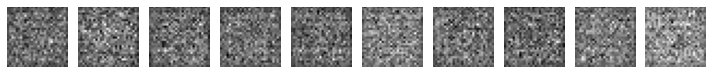

In [9]:
plot_generated_images(0, generator)

In [10]:
losses = []

def train(epochs, batch_size):
    num_batches = int(train_size/batch_size)
    for epoch in range(epochs+1):
        print(f'Training epoch {epoch}')
        progressbar = IntProgress(min=0, max=num_batches)
        display(progressbar)
        for i in range(num_batches):
            noise = np.random.normal(0, 1, size=[batch_size, noise_dim])
            sample_batch = train_data[np.random.randint(0, train_size, size=batch_size)]
#             print(f'{i}/{num_batches} ', end='')
            generated_batch = generator.predict(noise, verbose=0)
            X = np.concatenate([sample_batch, generated_batch])
            
            y_dis = np.zeros(2*batch_size)
            y_dis[:batch_size] = 0.9
            
            discriminator.trainable = True
            d_loss = discriminator.train_on_batch(X, y_dis)
            losses.append(d_loss)
            
            noise = np.random.normal(0, 1, size=[batch_size, 100])
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            
            dcgan.train_on_batch(noise, y_gen)
            progressbar.value+=1
        if epoch % 20 == 0:
            print(f'{epoch=}')
            plot_generated_images(epoch, generator)
            
        

Training epoch 0


IntProgress(value=0, max=468)

epoch=0
1/1 [==============================] - 0s 174ms/step


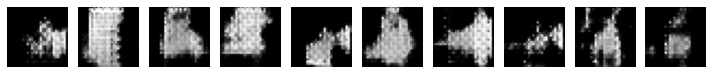

Training epoch 1


IntProgress(value=0, max=468)

Training epoch 2


IntProgress(value=0, max=468)

Training epoch 3


IntProgress(value=0, max=468)

Training epoch 4


IntProgress(value=0, max=468)

Training epoch 5


IntProgress(value=0, max=468)

Training epoch 6


IntProgress(value=0, max=468)

Training epoch 7


IntProgress(value=0, max=468)

Training epoch 8


IntProgress(value=0, max=468)

Training epoch 9


IntProgress(value=0, max=468)

Training epoch 10


IntProgress(value=0, max=468)

Training epoch 11


IntProgress(value=0, max=468)

Training epoch 12


IntProgress(value=0, max=468)

Training epoch 13


IntProgress(value=0, max=468)

Training epoch 14


IntProgress(value=0, max=468)

Training epoch 15


IntProgress(value=0, max=468)

Training epoch 16


IntProgress(value=0, max=468)

Training epoch 17


IntProgress(value=0, max=468)

Training epoch 18


IntProgress(value=0, max=468)

Training epoch 19


IntProgress(value=0, max=468)

Training epoch 20


IntProgress(value=0, max=468)

epoch=20
1/1 [==============================] - 0s 15ms/step


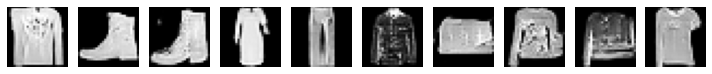

Training epoch 21


IntProgress(value=0, max=468)

Training epoch 22


IntProgress(value=0, max=468)

Training epoch 23


IntProgress(value=0, max=468)

Training epoch 24


IntProgress(value=0, max=468)

Training epoch 25


IntProgress(value=0, max=468)

Training epoch 26


IntProgress(value=0, max=468)

Training epoch 27


IntProgress(value=0, max=468)

Training epoch 28


IntProgress(value=0, max=468)

Training epoch 29


IntProgress(value=0, max=468)

Training epoch 30


IntProgress(value=0, max=468)

Training epoch 31


IntProgress(value=0, max=468)

Training epoch 32


IntProgress(value=0, max=468)

Training epoch 33


IntProgress(value=0, max=468)

Training epoch 34


IntProgress(value=0, max=468)

Training epoch 35


IntProgress(value=0, max=468)

Training epoch 36


IntProgress(value=0, max=468)

Training epoch 37


IntProgress(value=0, max=468)

Training epoch 38


IntProgress(value=0, max=468)

Training epoch 39


IntProgress(value=0, max=468)

Training epoch 40


IntProgress(value=0, max=468)

epoch=40
1/1 [==============================] - 0s 15ms/step


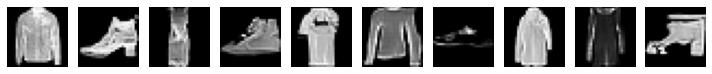

Training epoch 41


IntProgress(value=0, max=468)

Training epoch 42


IntProgress(value=0, max=468)

Training epoch 43


IntProgress(value=0, max=468)

Training epoch 44


IntProgress(value=0, max=468)

Training epoch 45


IntProgress(value=0, max=468)

Training epoch 46


IntProgress(value=0, max=468)

Training epoch 47


IntProgress(value=0, max=468)

Training epoch 48


IntProgress(value=0, max=468)

Training epoch 49


IntProgress(value=0, max=468)

Training epoch 50


IntProgress(value=0, max=468)

Training epoch 51


IntProgress(value=0, max=468)

Training epoch 52


IntProgress(value=0, max=468)

Training epoch 53


IntProgress(value=0, max=468)

Training epoch 54


IntProgress(value=0, max=468)

Training epoch 55


IntProgress(value=0, max=468)

Training epoch 56


IntProgress(value=0, max=468)

Training epoch 57


IntProgress(value=0, max=468)

Training epoch 58


IntProgress(value=0, max=468)

Training epoch 59


IntProgress(value=0, max=468)

Training epoch 60


IntProgress(value=0, max=468)

epoch=60
1/1 [==============================] - 0s 14ms/step


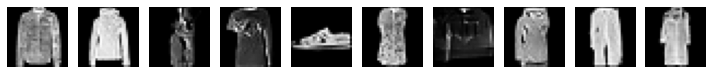

Training epoch 61


IntProgress(value=0, max=468)

Training epoch 62


IntProgress(value=0, max=468)

Training epoch 63


IntProgress(value=0, max=468)

Training epoch 64


IntProgress(value=0, max=468)

Training epoch 65


IntProgress(value=0, max=468)

Training epoch 66


IntProgress(value=0, max=468)

Training epoch 67


IntProgress(value=0, max=468)

Training epoch 68


IntProgress(value=0, max=468)

Training epoch 69


IntProgress(value=0, max=468)

Training epoch 70


IntProgress(value=0, max=468)

Training epoch 71


IntProgress(value=0, max=468)

Training epoch 72


IntProgress(value=0, max=468)

Training epoch 73


IntProgress(value=0, max=468)

Training epoch 74


IntProgress(value=0, max=468)

Training epoch 75


IntProgress(value=0, max=468)

Training epoch 76


IntProgress(value=0, max=468)

Training epoch 77


IntProgress(value=0, max=468)

Training epoch 78


IntProgress(value=0, max=468)

Training epoch 79


IntProgress(value=0, max=468)

Training epoch 80


IntProgress(value=0, max=468)

epoch=80
1/1 [==============================] - 0s 15ms/step


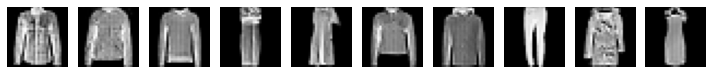

Training epoch 81


IntProgress(value=0, max=468)

Training epoch 82


IntProgress(value=0, max=468)

Training epoch 83


IntProgress(value=0, max=468)

Training epoch 84


IntProgress(value=0, max=468)

Training epoch 85


IntProgress(value=0, max=468)

Training epoch 86


IntProgress(value=0, max=468)

Training epoch 87


IntProgress(value=0, max=468)

Training epoch 88


IntProgress(value=0, max=468)

Training epoch 89


IntProgress(value=0, max=468)

Training epoch 90


IntProgress(value=0, max=468)

Training epoch 91


IntProgress(value=0, max=468)

Training epoch 92


IntProgress(value=0, max=468)

Training epoch 93


IntProgress(value=0, max=468)

Training epoch 94


IntProgress(value=0, max=468)

Training epoch 95


IntProgress(value=0, max=468)

Training epoch 96


IntProgress(value=0, max=468)

Training epoch 97


IntProgress(value=0, max=468)

Training epoch 98


IntProgress(value=0, max=468)

Training epoch 99


IntProgress(value=0, max=468)

Training epoch 100


IntProgress(value=0, max=468)

epoch=100
1/1 [==============================] - 0s 15ms/step


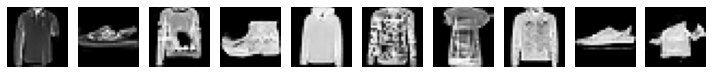

In [11]:
train(100, 128)

1/1 [==============================] - 0s 58ms/step


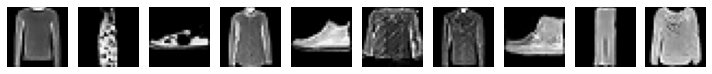

In [14]:
plot_generated_images(100, generator)

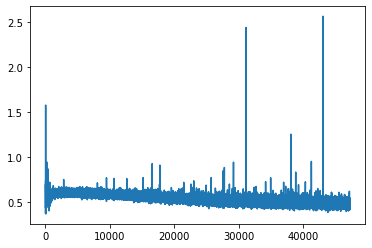

In [15]:
plt.plot(losses)